# SVM

In [4]:
import matplotlib.pyplot as plt
import cv2
import os, glob
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from skimage.feature import local_binary_pattern as LBP
from sklearn.linear_model import LogisticRegression
import pickle
import seaborn as sns
from sklearn.svm import SVC
import numpy as np

def imshow(image, title=None):
    plt.imshow(image, 'gray')
    plt.title(title)
    plt.axis('off')
    plt.show()
    
def showGridImage(images, labels, gSize=7, title=None):
    selectedIndex = np.random.choice(len(images), gSize*gSize, replace=False)
    fig, axes = plt.subplots(gSize,gSize, figsize=(10, 10))
    for i, ax in enumerate(axes.ravel()):
        index = selectedIndex[i]
        image = images[index]
        label = labels[index]
        ax.imshow(image.reshape(100,100), 'gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f"{classes[label]}")
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

In [5]:
mainPath = './ImagesForClassification/'
classes = os.listdir(mainPath)
images=[]
lbpFeatures = []
labels = []
for cls in classes:
    folderPath = os.path.join(mainPath, cls)
    for imgName in os.listdir(folderPath):
        imagePath = os.path.join(folderPath, imgName)
        img = cv2.imread(imagePath,0)
        img = cv2.resize(img, (100,100))
        images.append(img.flatten())
        
        labels.append(classes.index(cls))

In [7]:
images=np.array(images)
labels=np.array(labels)

In [8]:
trainImages, testImages, trainLabels, testLabels = train_test_split(images, labels, test_size=0.2, random_state=0)

In [9]:
svmModel=SVC()
svmModel.fit(trainImages,trainLabels)
svmpridic=svmModel.predict(trainImages)


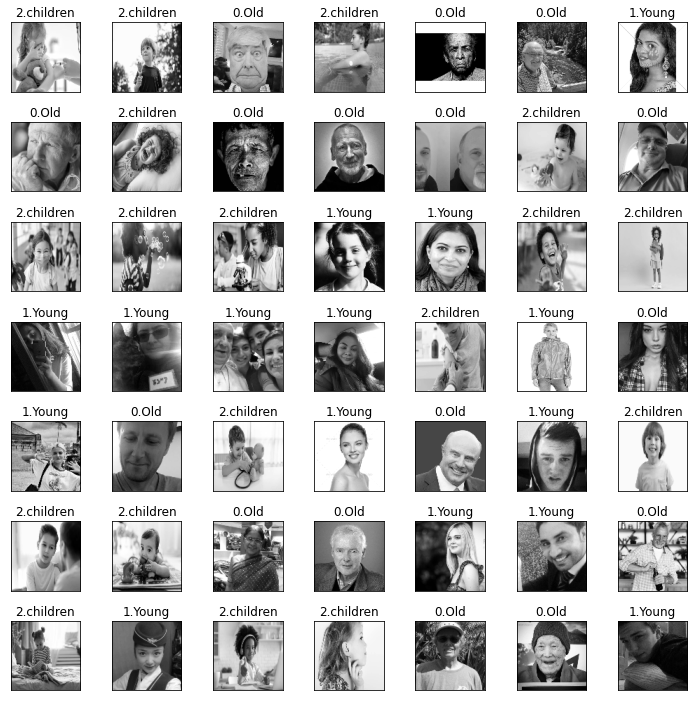

In [14]:
accuracy_score(trainLabels,svmpridic)
showGridImage(images,labels)


In [15]:
import pickle

# Save the trained SVM model to a file using pickle
with open('svm_model.pkl', 'wb') as file:
    pickle.dump(svmModel, file)

# Now, you can load the model back using pickle
with open('svm_model.pkl', 'rb') as file:
    loaded_svm_model = pickle.load(file)


# LBP

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os, glob
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from skimage.feature import local_binary_pattern



In [17]:
def imshow(image, title=None):
    plt.imshow(image, 'gray')
    plt.title(title)
    plt.axis('off')
    plt.show()
    
def showGridImage(images, labels, gSize=5, title=None):
    selectedIndex = np.random.choice(len(images), gSize*gSize, replace=False)
    fig, axes = plt.subplots(gSize,gSize, figsize=(10, 10))
    for i, ax in enumerate(axes.ravel()):
        index = selectedIndex[i]
        image = images[index]
        label = labels[index]
        ax.imshow(image.reshape(100,100), 'gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f"{classes[label]}")
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()


In [18]:
mainPath = './ImagesForClassification' # './image classification/Cars'
classes = os.listdir(mainPath)
images = []
labels = []
for cls in classes:
    folderPath = os.path.join(mainPath, cls)
    for imgName in os.listdir(folderPath):
        fullPath = os.path.join(folderPath, imgName)
        img = cv2.imread(fullPath,0)
        img = cv2.resize(img, (100,100))
        images.append(img.flatten())
        label = classes.index(cls)
        labels.append(label)

In [19]:
images = np.array(images)
labels = np.array(labels)

In [20]:
xTrain, xTest, yTrain, yTest = train_test_split(images, labels, train_size=0.8, random_state=40)

In [21]:
model = LogisticRegression()
model.fit(xTrain, yTrain)

C:\Users\Welcome\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
preds = model.predict(xTest)

In [23]:
accuracy_score(yTest, preds)

0.4744897959183674

In [24]:
import pickle

# Save the trained SVM model to a file using pickle
with open('LBP_Model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Now, you can load the model back using pickle
with open('LBP_Model.pkl', 'rb') as file:
    loaded_svm_model = pickle.load(file)

# HOG

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os, glob
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from skimage.feature import local_binary_pattern as LBP
from skimage.feature import hog
import seaborn as sns

In [27]:
def imshow(image, title=None):
    plt.imshow(image, 'gray')
    plt.title(title)
    plt.axis('off')
    plt.show()
    
def showGridImage(images, labels, gSize=5, title=None):
    selectedIndex = np.random.choice(len(images), gSize*gSize, replace=False)
    fig, axes = plt.subplots(gSize,gSize, figsize=(10, 10))
    for i, ax in enumerate(axes.ravel()):
        index = selectedIndex[i]
        image = images[index]
        label = labels[index]
        ax.imshow(image.reshape(100,100), 'gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f"{classes[label]}")
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

In [28]:
classes = os.listdir(mainPath)
hogImages = []
hogFeatures = []
labels = []
for cls in classes:
    folderPath = os.path.join(mainPath, cls)
    for imgName in os.listdir(folderPath):
        imagePath = os.path.join(folderPath, imgName)
        img = cv2.imread(imagePath,0)
        img = cv2.resize(img, (100,100))
        feat, hogImage = hog(img, visualize=True)
        hogFeatures.append(feat.flatten())
        labels.append(classes.index(cls))
        hogImages.append(hogImage)

In [29]:
hogFeatures = np.array(hogFeatures)
labels = np.array(labels)

In [30]:
hogFeatsTrain, hogFeatsTest, trainlabels, testLabels = train_test_split(hogFeatures, labels, test_size=0.2, random_state=0)
hogImagesTrain, hogImagesTest,_,_ = train_test_split(hogImages, labels, test_size=0.2, random_state=0)

In [31]:
model = LogisticRegression()
model.fit(hogFeatsTrain, trainlabels)

C:\Users\Welcome\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
preds = model.predict(hogFeatsTest)

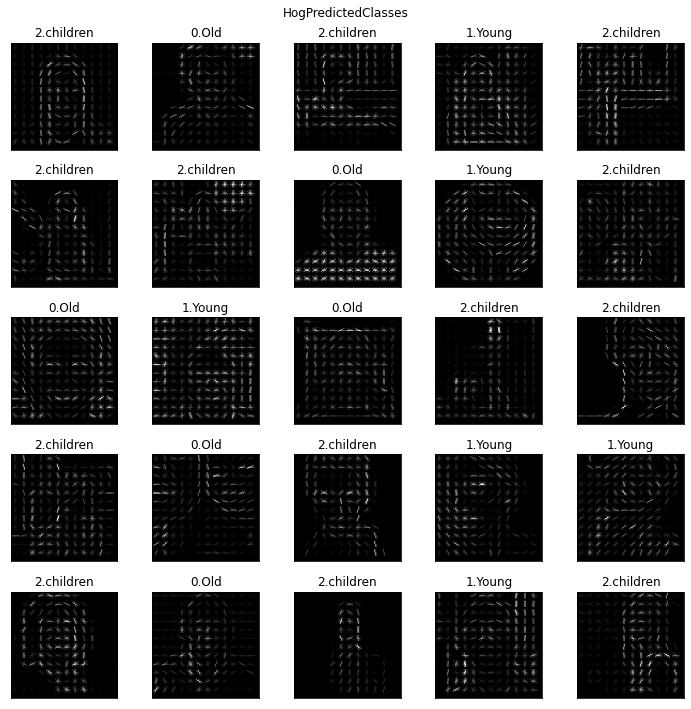

In [33]:
showGridImage(hogImagesTest, preds, 5, 'HogPredictedClasses')

In [35]:
accuracy_score(testLabels, preds)

0.6224489795918368

In [36]:
with open('HOG_Model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Voting Classifier